In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
import os
print(os.listdir("train.csv/"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_df=pd.read_csv("train.csv/train.csv",nrows=1000000)
test_df=pd.read_csv("train.csv/test.csv")

Exploratory Data Analysis
* Explore datasets like size,dimensions, variables, variable types, mean, median, mode etc
* Checking missing or nan values,
* Chceking outliers


In [3]:
train_df.shape

(1000000, 8)

In [4]:
train_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [5]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null object
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [7]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [9]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [10]:
train_df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [11]:
#Drop the missing values record
train_df= train_df.drop(train_df[train_df.isnull().any(1)].index, axis = 0)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
key                  999990 non-null object
fare_amount          999990 non-null float64
pickup_datetime      999990 non-null object
pickup_longitude     999990 non-null float64
pickup_latitude      999990 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      999990 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [13]:
Counter(train_df['fare_amount']<0)

Counter({False: 999952, True: 38})

There are 38 field with negative value since fare will never be negative, so it is good to drop the records

In [14]:
#Drop the negative fare record
train_df= train_df.drop(train_df[train_df['fare_amount']<0].index, axis = 0)
train_df.shape

(999952, 8)

In [15]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000
mean,11.348616,-72.526719,39.929050,-72.528101,39.920086,1.684942
std,9.821249,12.057786,7.626126,11.323777,8.201183,1.323908
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In Passenger_count field the maximum passenger is 208 hance this is not correct. More than 6 passenger in a taxi(sedan or suv) is not making sense in ideal case,so we will drop the record which have more than six passenger

In [16]:
Counter(train_df['passenger_count']>6)

Counter({False: 999951, True: 1})

In [17]:
train_df= train_df.drop(train_df[train_df['passenger_count']>6].index, axis = 0)
train_df.shape

(999951, 8)

In [18]:
Counter(train_df['pickup_latitude']<-90)

Counter({False: 999948, True: 3})

In [19]:
Counter(train_df['pickup_latitude']>90)

Counter({False: 999942, True: 9})

In [20]:
#We need to drop these outliers
train_df = train_df.drop(((train_df[train_df['pickup_latitude']<-90])|(train_df[train_df['pickup_latitude']>90])).index, axis=0)

In [21]:
train_df.shape

(999939, 8)

In [22]:
Counter(train_df['pickup_longitude']<-180)

Counter({False: 999928, True: 11})

In [23]:
Counter(train_df['pickup_longitude']>180)

Counter({False: 999939})

In [24]:
#We need to drop these outliers
train_df = train_df.drop((train_df[train_df['pickup_longitude']<-180]).index, axis=0)

In [25]:
train_df.shape

(999928, 8)

In [26]:
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [27]:
train_df.head(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2


key and pickup_datetime seems to be datetime colume

In [28]:
train_df['key']=pd.to_datetime(train_df['key'])
train_df['pickup_datetime']=pd.to_datetime(train_df['pickup_datetime'])

In [29]:
train_df.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [30]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [31]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [32]:
test_df['key']=pd.to_datetime(test_df['key'])
test_df['pickup_datetime']=pd.to_datetime(test_df['pickup_datetime'])

In [33]:
test_df.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [34]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [35]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


Now EDA for affecting fare_amount since our output variable is fare_amount so we can do Bivariate analysis and the observation could be:
* Does date time effect the fare price?
* Does passenger counts effect the fare price?
* Does distance effects the fair price?
* Does day of the week effect the fare price?

To finding these assumtion we will find the surface distance between two points: Longitude and Latitude

In [36]:
data=[train_df,test_df]
for i in data:
    i['date']=i['pickup_datetime'].dt.day
    i['month']=i['pickup_datetime'].dt.month
    i['day_of_week']=i['pickup_datetime'].dt.dayofweek
    i['hour']=i['pickup_datetime'].dt.hour
    i['year']=i['pickup_datetime'].dt.year
    

In [37]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,15,6,0,17,2009
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5,1,1,16,2010
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,3,0,2011
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,21,4,5,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,1,7,2010


In [38]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year
count,999928.000000,999928.000000,999928.000000,999928.000000,999928.000000,999928.000000,999928.000000,999928.000000,999928.000000,999928.000000,999928.000000
mean,11.348651,-72.517420,39.926808,-72.521750,39.926691,1.684735,15.697959,6.267971,3.039842,13.509567,2011.741041
std,9.821286,10.393199,6.089187,10.626273,7.104385,1.307729,8.682469,3.436244,1.949968,6.513808,1.860737
min,0.000000,-128.175950,-74.016587,-1329.621332,-3114.338567,0.000000,1.000000,1.000000,0.000000,0.000000,2009.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000,8.000000,3.000000,1.000000,9.000000,2010.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,16.000000,6.000000,3.000000,14.000000,2012.000000
75%,12.500000,-73.967095,40.767153,-73.963654,40.768129,2.000000,23.000000,9.000000,5.000000,19.000000,2013.000000
max,500.000000,40.850357,69.400000,45.581619,1651.553433,6.000000,31.000000,12.000000,6.000000,23.000000,2015.000000


In [39]:
def sphere_distance(lat1,long1,lat2,long2):
    data=[train_df,test_df]
    for i in data:
        R=6367
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        d = (R * c)
        i['S_Distance'] = d
    return d #in Kilometer

In [40]:
sphere_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.321801
1        2.423830
2        0.618239
3        1.959801
4        5.383919
5        3.220526
6        0.929018
7       21.526578
8        3.871529
9        1.099103
10       2.316230
11       4.816153
12       0.722216
13       1.674451
14       2.502460
15       5.112164
16       0.298650
17       2.529558
18       0.779954
19       0.427014
20       1.650908
21       1.967974
22       1.304622
23       1.900101
24       5.776092
25       1.120982
26      14.297557
27       9.421951
28       1.143810
29       4.693422
          ...    
9884    15.109801
9885     5.003096
9886     7.372122
9887     1.679666
9888     0.000000
9889     2.376230
9890     2.942732
9891     5.949102
9892     2.948508
9893     4.732402
9894     3.099414
9895     8.994674
9896     2.396656
9897     5.078473
9898     0.554938
9899     5.606983
9900     1.889421
9901     1.529157
9902     3.889082
9903     2.297872
9904    15.081788
9905     9.607761
9906     0.369274
9907     9.917768
9908     1

In [41]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,15,6,0,17,2009,1.030117
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5,1,1,16,2010,8.444828
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,3,0,2011,1.388653
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,21,4,5,4,2012,2.797513
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,1,7,2010,1.997902


Does number of passenger affect the fare

Text(0,0.5,'Frequency')

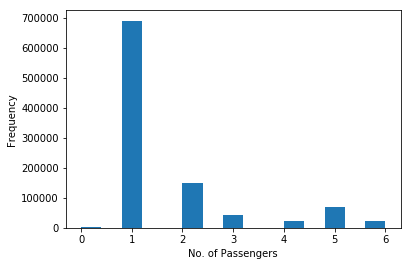

In [42]:
plt.hist(train_df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

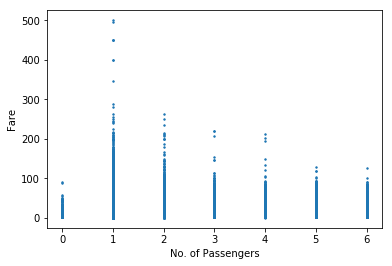

In [43]:
plt.scatter(x=train_df['passenger_count'], y=train_df['fare_amount'],s=2.0)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Does the date and time of pickup affect the fair

Text(0,0.5,'Fare')

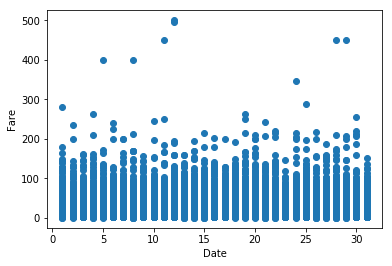

In [44]:
plt.scatter(x=train_df['date'], y=train_df['fare_amount'])
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0,0.5,'Fare')

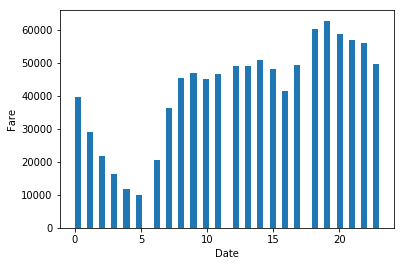

In [45]:
plt.hist(train_df['hour'],bins=50)
plt.xlabel('Date')
plt.ylabel('Fare')

Does day of the week affect fare

Text(0,0.5,'Fare')

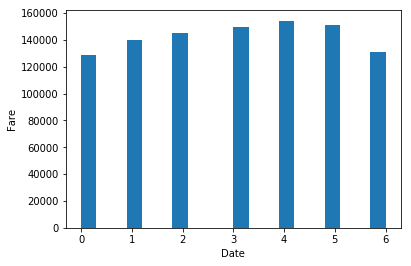

In [46]:
plt.hist(train_df['day_of_week'],bins=20)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0,0.5,'Fare')

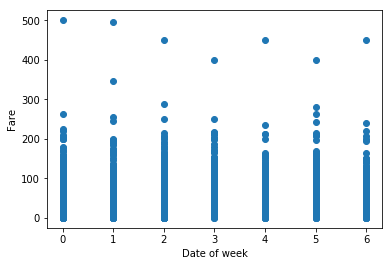

In [47]:
plt.scatter(x=train_df['day_of_week'], y=train_df['fare_amount'])
plt.xlabel('Date of week')
plt.ylabel('Fare')

****Does distance effects the fair price****
It is confirm that distance will always affect the fair price.

In [48]:
len(train_df)

999928

In [49]:
train_df.sort_values(['S_Distance','fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
748464,2013-01-02 11:33:00.000000200,15.00,2013-01-02 11:33:00,-74.015200,40.709665,-40.719295,1651.553433,5,2,1,2,11,2013,16867.706200
793922,2012-06-03 11:19:37.000000200,32.10,2012-06-03 11:19:37,-73.863359,40.769278,45.581619,-2.013462,2,3,6,6,11,2012,12586.797203
269695,2012-05-24 09:00:00.000000101,17.70,2012-05-24 09:00:00,-73.997572,40.720945,-1329.621332,40.773717,1,24,5,3,9,2012,10935.645436
646132,2012-02-08 20:24:00.000000173,10.50,2012-02-08 20:24:00,-89.439785,1.707957,0.000000,0.000000,1,8,2,2,20,2012,9939.033916
823943,2010-11-14 21:40:00.000000590,4.90,2010-11-14 21:40:00,0.000000,0.000000,-73.960303,81.510177,1,14,11,6,21,2010,9741.467454
401445,2011-02-26 03:28:03.000000600,14.50,2011-02-26 03:28:03,0.000000,0.000000,-75.433371,40.752047,1,26,2,5,3,2011,8780.719232
207647,2011-04-19 17:56:04.000000300,38.90,2011-04-19 17:56:04,0.000000,0.000000,-75.423754,40.773877,1,19,4,1,17,2011,8780.327096
336392,2011-05-11 20:06:55.000000600,34.50,2011-05-11 20:06:55,0.000000,0.000000,-75.294555,40.699667,1,11,5,2,20,2011,8768.217277
830134,2011-03-01 00:23:54.000000100,45.00,2011-03-01 00:23:54,0.000000,0.000000,-74.689831,40.190564,1,1,3,1,0,2011,8708.139207
527929,2011-03-01 21:31:43.000000300,7.70,2011-03-01 21:31:43,0.000000,0.000000,-74.689831,40.190564,1,1,3,1,21,2011,8708.139207


In [50]:
dis_0 = train_df.loc[(train_df['S_Distance'] == 0), ['S_Distance']]
dis_1 = train_df.loc[(train_df['S_Distance'] > 0) & (train_df['S_Distance'] <= 10), ['S_Distance']]
dis_2 = train_df.loc[(train_df['S_Distance'] > 10) & (train_df['S_Distance'] <= 50), ['S_Distance']]
dis_3 = train_df.loc[(train_df['S_Distance'] > 50) & (train_df['S_Distance'] <= 100), ['S_Distance']]
dis_4 = train_df.loc[(train_df['S_Distance'] > 100) & (train_df['S_Distance'] <= 200), ['S_Distance']]
dis_5 = train_df.loc[(train_df['S_Distance'] > 200) & (train_df['S_Distance'] <= 300), ['S_Distance']]
dis_6 = train_df.loc[(train_df['S_Distance'] > 300) & (train_df['S_Distance'] <= 500), ['S_Distance']]
dis_7 = train_df.loc[(train_df['S_Distance'] > 500), ['S_Distance']]
dis_0['bins']='0'
dis_1['bins']='0-10'
dis_2['bins']='11-50'
dis_3['bins']='51-100'
dis_4['bins']='101-200'
dis_5['bins']='201-300'
dis_6['bins']='301-500'
dis_7['bins']='>500'
dis_bin=pd.concat([dis_0,dis_1,dis_2,dis_3,dis_4,dis_5,dis_6,dis_7])
dis_bin

,S_Distance,bins
11,0.000000,0
15,0.000000,0
26,0.000000,0
105,0.000000,0
124,0.000000,0
191,0.000000,0
192,0.000000,0
233,0.000000,0
270,0.000000,0
273,0.000000,0


In [51]:
x=Counter(dis_bin['bins'])
x

Counter({'0': 28481,
         '0-10': 920140,
         '11-50': 49004,
         '51-100': 148,
         '101-200': 205,
         '201-300': 5,
         '301-500': 11,
         '>500': 1934})

In [52]:
train_df.loc[((train_df['pickup_latitude']==0) & (train_df['pickup_longitude']==0))&((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,8,4,2,0,2015,8656.901767


In [53]:
train_df.loc[((train_df['pickup_latitude']==0) & (train_df['pickup_longitude']==0))&((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,8,4,2,0,2015,8656.901767


In [54]:
train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']==0) & (train_df['pickup_longitude']==0))&((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)].index, axis=0)

In [55]:
train_df.shape

(999927, 14)

In [56]:
#dropoff latitude and longitude = 0
train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']==0) & (train_df['pickup_longitude']==0))&((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)].index, axis=0)


In [57]:
train_df.shape

(999927, 14)

In [58]:
high_distance = train_df.loc[(train_df['S_Distance']>200)&(train_df['fare_amount']!=0)]

In [59]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,22,2,6,22,2009,8661.863245
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,10,3,3,20,2011,8659.828143
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,29,8,0,8,2011,6022.710512
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,24,6,6,17,2012,8662.012603
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,7,4,1,23,2015,8659.783350
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,30,3,1,7,2010,8661.124771
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,4,3,6,1,2012,5417.585418
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,28,7,0,15,2014,8658.751720
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,27,2,4,16,2015,8657.600078
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,18,6,5,4,2011,4444.294617


In [60]:
high_distance.shape

(1946, 14)

In [61]:
high_distance['S_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,22,2,6,22,2009,0.000000
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,10,3,3,20,2011,2.051282
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,29,8,0,8,2011,4.102564
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,24,6,6,17,2012,27.243590
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,7,4,1,23,2015,2.884615
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,30,3,1,7,2010,2.820513
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,4,3,6,1,2012,3.846154
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,28,7,0,15,2014,8.333333
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,27,2,4,16,2015,8.974359
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,18,6,5,4,2011,1.282051


In [63]:
train_df.update(high_distance)

In [64]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
0,2009-06-15 17:26:21.000000100,4.50,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,15.0,6.0,0.0,17.0,2009.0,1.030117
1,2010-01-05 16:52:16.000000200,16.90,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,5.0,1.0,1.0,16.0,2010.0,8.444828
2,2011-08-18 00:35:00.000000490,5.70,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18.0,8.0,3.0,0.0,2011.0,1.388653
3,2012-04-21 04:30:42.000000100,7.70,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,21.0,4.0,5.0,4.0,2012.0,2.797513
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9.0,3.0,1.0,7.0,2010.0,1.997902
5,2011-01-06 09:50:45.000000200,12.10,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,6.0,1.0,3.0,9.0,2011.0,3.784861
6,2012-11-20 20:35:00.000000100,7.50,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,20.0,11.0,1.0,20.0,2012.0,1.554830
7,2012-01-04 17:22:00.000000810,16.50,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,4.0,1.0,2.0,17.0,2012.0,4.152835
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1.0,3.0,12.0,0.0,13.0,2012.0,1.252445
9,2009-09-02 01:11:00.000000830,8.90,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2.0,9.0,2.0,1.0,2009.0,2.847838


In [65]:
train_df[train_df['S_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,24.0,12.0,0.0,11.0,2012.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,23.0,11.0,5.0,12.0,2013.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,7.0,2.0,0.0,20.0,2011.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,25.0,3.0,2.0,0.0,2009.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,17.0,1.0,3.0,17.0,2013.0,0.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,8.0,1.0,2.0,21.0,2014.0,0.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,5.0,9.0,6.0,17.0,2010.0,0.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,24.0,7.0,6.0,1.0,2011.0,0.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,25.0,8.0,5.0,1.0,2012.0,0.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,30.0,10.0,4.0,18.0,2009.0,0.0


In [66]:
train_df[(train_df['S_Distance']==0)&(train_df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,21.0,8.0,2.0,21.0,2013.0,0.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,5.0,8.0,0.0,6.0,2013.0,0.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,4.0,3.0,2.0,22.0,2015.0,0.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,27.0,5.0,2.0,23.0,2015.0,0.0


In [67]:
train_df = train_df.drop(train_df[(train_df['S_Distance']==0)&(train_df['fare_amount']==0)].index, axis = 0)

In [68]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train_df.loc[(((train_df['hour']>=6)&(train_df['hour']<=20)) & ((train_df['day_of_week']>=1) & (train_df['day_of_week']<=5)) & (train_df['S_Distance']==0) & (train_df['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,21.0,1.0,2.0,6.0,2015.0,0.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,21.0,1.0,2.0,14.0,2015.0,0.0


In [69]:
train_df=train_df.drop(rush_hour.index,axis=0)

In [70]:
train_df.shape

(999921, 14)

In [71]:
non_rush_hour = train_df.loc[(((train_df['hour']<6)|(train_df['hour']>20)) & ((train_df['day_of_week']>=1)&(train_df['day_of_week']<=5)) & (train_df['S_Distance']==0) & (train_df['fare_amount'] < 3.0))]

In [72]:
non_rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,29.0,5.0,3.0,5.0,2014.0,0.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,19.0,1.0,1.0,1.0,2010.0,0.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,25.0,8.0,1.0,1.0,2009.0,0.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,6.0,7.0,4.0,22.0,2012.0,0.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,23.0,7.0,4.0,3.0,2010.0,0.0
16074,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,30.0,5.0,3.0,0.0,2013.0,0.0
17862,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,21.0,8.0,3.0,23.0,2014.0,0.0
18037,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,7.0,1.0,2.0,22.0,2009.0,0.0
24835,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,27.0,2.0,4.0,2.0,2015.0,0.0
29613,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,17.0,6.0,2.0,3.0,2009.0,0.0


In [73]:
non_rush_hour = train_df.loc[(((train_df['hour']<6)|(train_df['hour']>20)) & ((train_df['day_of_week']>=1)&(train_df['day_of_week']<=5)) & (train_df['S_Distance']==0) & (train_df['fare_amount'] < 3.0))]
non_rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,29.0,5.0,3.0,5.0,2014.0,0.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,19.0,1.0,1.0,1.0,2010.0,0.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,25.0,8.0,1.0,1.0,2009.0,0.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,6.0,7.0,4.0,22.0,2012.0,0.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,23.0,7.0,4.0,3.0,2010.0,0.0
16074,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,30.0,5.0,3.0,0.0,2013.0,0.0
17862,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,21.0,8.0,3.0,23.0,2014.0,0.0
18037,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,7.0,1.0,2.0,22.0,2009.0,0.0
24835,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,27.0,2.0,4.0,2.0,2015.0,0.0
29613,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,17.0,6.0,2.0,3.0,2009.0,0.0


In [74]:
train_df.loc[(train_df['S_Distance']!=0) & (train_df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,15.0,2.0,0.0,14.0,2010.0,3.182763
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1.0,15.0,5.0,4.0,21.0,2015.0,0.001063
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,18.0,3.0,3.0,19.0,2010.0,0.018409
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2.0,29.0,6.0,6.0,16.0,2014.0,0.009238
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1.0,15.0,4.0,2.0,14.0,2015.0,0.005780
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1.0,8.0,3.0,0.0,18.0,2010.0,0.000537
266485,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1.0,20.0,2.0,5.0,9.0,2010.0,0.003504
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,8.0,5.0,4.0,7.0,2015.0,0.526039
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,13.0,1.0,1.0,0.0,2015.0,2.997747
489767,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2.0,14.0,2.0,5.0,21.0,2015.0,0.000769


In [75]:
scenario_3 = train_df.loc[(train_df['S_Distance']!=0) & (train_df['fare_amount']==0)]
scenario_3

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,15.0,2.0,0.0,14.0,2010.0,3.182763
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1.0,15.0,5.0,4.0,21.0,2015.0,0.001063
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,18.0,3.0,3.0,19.0,2010.0,0.018409
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2.0,29.0,6.0,6.0,16.0,2014.0,0.009238
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1.0,15.0,4.0,2.0,14.0,2015.0,0.005780
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1.0,8.0,3.0,0.0,18.0,2010.0,0.000537
266485,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1.0,20.0,2.0,5.0,9.0,2010.0,0.003504
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,8.0,5.0,4.0,7.0,2015.0,0.526039
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,13.0,1.0,1.0,0.0,2015.0,2.997747
489767,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2.0,14.0,2.0,5.0,21.0,2015.0,0.000769


In [76]:
scenario_3 = train_df.loc[(train_df['S_Distance']!=0) & (train_df['fare_amount']==0)]

In [77]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['S_Distance'] * 1.56) + 2.50), axis=1
)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
scenario_3['fare_amount']

10002         7.465110
27891         2.501659
47302         2.528718
175352        2.514412
211455        2.509016
211499        2.500838
266485        2.505466
386734        3.320622
431819        7.176485
489767        2.501200
495273        2.500661
520715        3.156702
561786       19.513844
670254        2.500661
681342        2.501576
760662        3.034296
762802       25.583287
788466       28.018360
895361        3.369412
930680    13513.394644
938020        2.501201
942215    13508.865633
949564    13514.521014
957590        2.505503
Name: fare_amount, dtype: float64

In [79]:
train_df.loc[(train_df['S_Distance']==0) & (train_df['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,24.0,12.0,0.0,11.0,2012.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,23.0,11.0,5.0,12.0,2013.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,7.0,2.0,0.0,20.0,2011.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,25.0,3.0,2.0,0.0,2009.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,17.0,1.0,3.0,17.0,2013.0,0.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,8.0,1.0,2.0,21.0,2014.0,0.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,5.0,9.0,6.0,17.0,2010.0,0.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,24.0,7.0,6.0,1.0,2011.0,0.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,25.0,8.0,5.0,1.0,2012.0,0.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,30.0,10.0,4.0,18.0,2009.0,0.0


In [80]:
scenario_4 = train_df.loc[(train_df['S_Distance']==0) & (train_df['fare_amount']!=0)]

In [81]:
scenario_4

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,24.0,12.0,0.0,11.0,2012.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,23.0,11.0,5.0,12.0,2013.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,7.0,2.0,0.0,20.0,2011.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,25.0,3.0,2.0,0.0,2009.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,17.0,1.0,3.0,17.0,2013.0,0.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,8.0,1.0,2.0,21.0,2014.0,0.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,5.0,9.0,6.0,17.0,2010.0,0.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,24.0,7.0,6.0,1.0,2011.0,0.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,25.0,8.0,5.0,1.0,2012.0,0.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,30.0,10.0,4.0,18.0,2009.0,0.0


In [82]:
len(scenario_3)

24

In [83]:
len(scenario_4)

28661

In [84]:
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['S_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,29.0,5.0,3.0,5.0,2014.0,0.0
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,22.0,2.0,6.0,22.0,2009.0,0.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,19.0,1.0,1.0,1.0,2010.0,0.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,25.0,8.0,1.0,1.0,2009.0,0.0
799,2013-12-08 23:39:00.000000800,3.0,2013-12-08 23:39:00,0.000000,0.000000,0.000000,0.000000,5.0,8.0,12.0,6.0,23.0,2013.0,0.0
958,2011-02-22 14:09:00.000000660,2.5,2011-02-22 14:09:00,0.000000,0.000000,0.000000,0.000000,5.0,22.0,2.0,1.0,14.0,2011.0,0.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,21.0,7.0,6.0,0.0,2013.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,27.0,8.0,0.0,15.0,2012.0,0.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,6.0,7.0,4.0,22.0,2012.0,0.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,13.0,1.0,0.0,16.0,2014.0,0.0


In [85]:
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['S_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,day_of_week,hour,year,S_Distance
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,24.0,12.0,0.0,11.0,2012.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,23.0,11.0,5.0,12.0,2013.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,7.0,2.0,0.0,20.0,2011.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,25.0,3.0,2.0,0.0,2009.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,17.0,1.0,3.0,17.0,2013.0,0.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,8.0,1.0,2.0,21.0,2014.0,0.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,5.0,9.0,6.0,17.0,2010.0,0.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,24.0,7.0,6.0,1.0,2011.0,0.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,25.0,8.0,5.0,1.0,2012.0,0.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,30.0,10.0,4.0,18.0,2009.0,0.0


In [86]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['S_Distance']==0)]

In [87]:
len(scenario_4_sub)

27159

In [88]:
scenario_4_sub['S_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
train_df.update(scenario_4_sub)

In [90]:
len(train_df)

999921

In [91]:
train_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'date', 'month', 'day_of_week', 'hour', 'year',
       'S_Distance'],
      dtype='object')

In [92]:
test_df.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'month', 'day_of_week', 'hour', 'year', 'S_Distance'],
      dtype='object')

In [93]:
train_df = train_df.drop(['key','pickup_datetime'], axis = 1)
test_df = test_df.drop(['key','pickup_datetime'], axis = 1)

In [94]:
train_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'month', 'day_of_week', 'hour', 'year', 'S_Distance'],
      dtype='object')

In [95]:
test_df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'date', 'month', 'day_of_week',
       'hour', 'year', 'S_Distance'],
      dtype='object')

In [96]:
x_train = train_df.iloc[:,train_df.columns!='fare_amount']
y_train = train_df['fare_amount'].values
x_test = test_df

In [97]:
x_train.shape

(999921, 11)

In [98]:
y_train.shape

(999921,)

In [99]:
rg=RandomForestRegressor()
rg.fit(x_train,y_train)
y_predict=rg.predict(x_test)
y_predict

array([10.45 ,  9.5  ,  3.7  , ..., 54.153, 17.3  ,  7.15 ])

In [102]:
submission = pd.read_csv('train.csv/sample_submission.csv')
submission['fare_amount'] = y_predict
submission.to_csv('sample_submission.csv', index=False)
submission.head(10)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.45
1,2015-01-27 13:08:24.0000003,9.50
2,2011-10-08 11:53:44.0000002,3.70
3,2012-12-01 21:12:12.0000002,8.40
4,2012-12-01 21:12:12.0000003,15.00
5,2012-12-01 21:12:12.0000005,11.07
6,2011-10-06 12:10:20.0000001,5.78
7,2011-10-06 12:10:20.0000003,48.91
8,2011-10-06 12:10:20.0000002,11.26
9,2014-02-18 15:22:20.0000002,6.40


In [101]:
df11=pd.read_csv("train.csv/sample_submission.csv")
df11.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
